# Types of Clustering Algorithm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

%matplotlib inline
sns.set_context("poster")
sns.set_color_codes()
plot_kwds = {"alpha": 0.25, "s": 80, "linewidths": 0}

In [3]:
data = np.load("clusterable_data.npy")

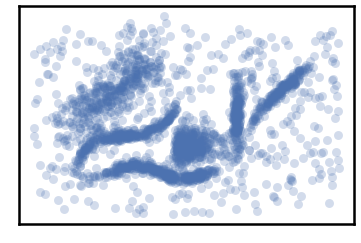

In [4]:
plt.scatter(data.T[0], data.T[1], c="b", **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Testing Clustering Algorithms

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette("deep", np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title("Clusters found by {}".format(str(algorithm.__name__)), fontsize=20)
    plt.text(
        -0.5, 0.7, "Clustering took {:.2f} s".format(end_time - start_time), fontsize=10
    )

# K-Means

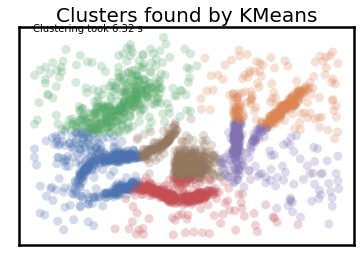

In [8]:
plot_clusters(data, cluster.KMeans, (), {"n_clusters": 6})

# Affinity Propagation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:151: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


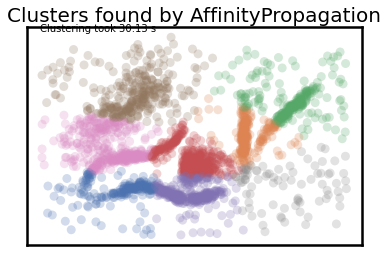

In [9]:
plot_clusters(
    data, cluster.AffinityPropagation, (), {"preference": -5.0, "damping": 0.95}
)

# Mean Shift

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass bandwidth=0.175 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


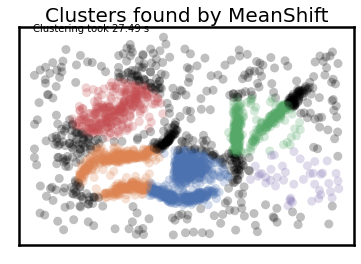

In [10]:
plot_clusters(data, cluster.MeanShift, (0.175,), {"cluster_all": False})

# Spectral Clustering

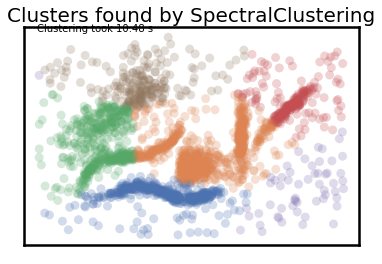

In [11]:
plot_clusters(data, cluster.SpectralClustering, (), {"n_clusters": 6})

# Agglomerative Clustering

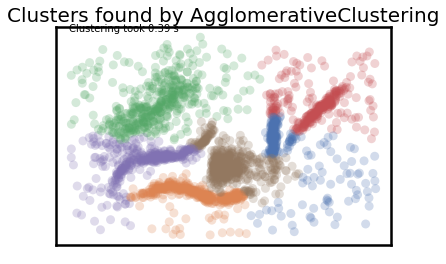

In [12]:
plot_clusters(
    data, cluster.AgglomerativeClustering, (), {"n_clusters": 6, "linkage": "ward"}
)

# DBSCAN

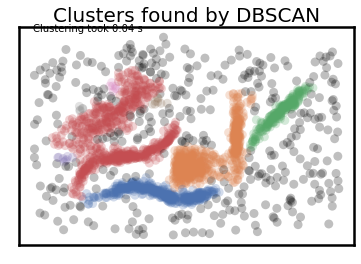

In [13]:
plot_clusters(data, cluster.DBSCAN, (), {"eps": 0.025})

# HDBSCAN

In [15]:
import hdbscan

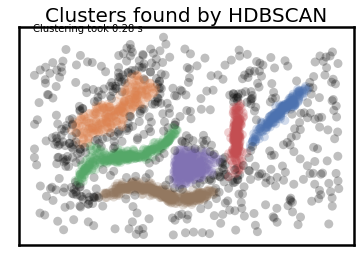

In [16]:
plot_clusters(data, hdbscan.HDBSCAN, (), {"min_cluster_size": 15})